In [1]:
import numpy as np
import matplotlib.pyplot as plt


from Lineaire.Linear import *
from Loss.MSELoss import *
from Activation.Tanh import Tanh
from Activation.Sigmoide import Sigmoide


from utils import tools as tl

Classification binaire de données non-séparables (4 gaussiennes)

# Chargement des données

In [2]:
size = 1000

datax, datay = tl.gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=1, epsilon=0.1)
testx, testy = tl.gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=1, epsilon=0.1)

datay = np.where(datay==-1,0,1).reshape((-1,1))
testy = np.where(testy==-1,0,1).reshape((-1,1))


# Test

In [3]:
loss_mse = MSELoss()
lineaire1 = Linear( datax.shape[1], 4, init_type=1)
lineaire2 = Linear(4, 1, init_type=1)
sig = Sigmoide()
tanh = Tanh()

couts=[]
iter=1500

for _ in range(iter):
    
    #forward
    output_lineaire1 = lineaire1.forward(datax)   
    new_feautre_activation_1 = tanh.forward(output_lineaire1)
    new_feautre_lin_2 = lineaire2.forward(new_feautre_activation_1)
    y_hat = sig.forward(new_feautre_lin_2)
    loss = loss_mse.forward(datay,y_hat)
    couts.append(loss.mean())
    
    #backward
    loss_back = loss_mse.backward(datay, y_hat)
    delta_sig = sig.backward_delta(new_feautre_lin_2,loss_back)
    delta_lin2 = lineaire2.backward_delta(new_feautre_activation_1,delta_sig)
    delta_tan = tanh.backward_delta(output_lineaire1,delta_lin2)
    delta_lin1 = lineaire1.backward_delta(datax,delta_tan)

    lineaire2.backward_update_gradient(new_feautre_activation_1, delta_sig)
    lineaire1.backward_update_gradient(datax, delta_tan)    

    lineaire2.update_parameters(gradient_step = 1e-3)
    lineaire1.update_parameters(gradient_step = 1e-3)
    
    lineaire1.zero_grad()
    lineaire2.zero_grad()
    


In [ ]:
def predict(x):
    hidden_l = lineaire1.forward(x)
    hidden_l = tanh.forward(hidden_l)
    hidden_l = lineaire2.forward(hidden_l)
    hidden_l = sig.forward(hidden_l)  
    return np.where(hidden_l >= 0.5, 1, 0)

accuracy en train:  0.996
accuracy en test:  1.0


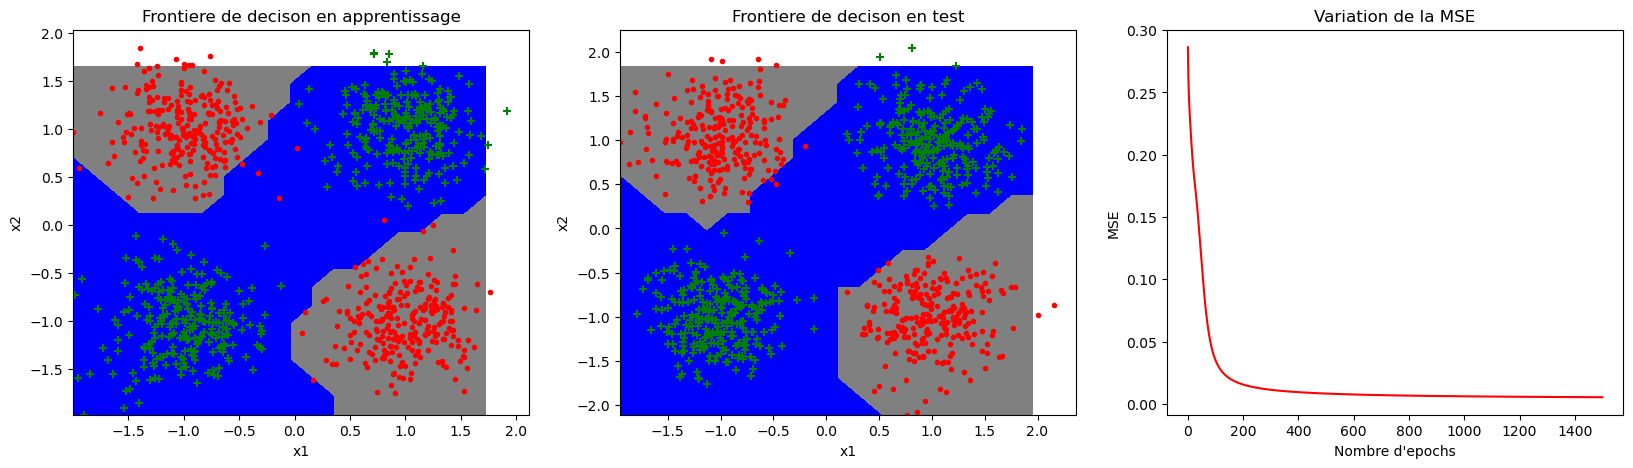

In [4]:
print("accuracy en train: ", np.where(datay == predict(datax),1,0).mean())
print("accuracy en test: ", np.where(testy == predict(testx),1,0).mean())

fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(20,5))
ax.flatten()

tl.plot_frontiere(datax,predict,ax=ax[0])
tl.plot_data(datax, datay,ax[0])
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[0].set_title("Frontiere de decison en apprentissage")

tl.plot_frontiere(testx,predict,ax=ax[1])
tl.plot_data(testx, testy,ax[1])
ax[1].set_xlabel("x1")
ax[1].set_ylabel("x2")
ax[1].set_title("Frontiere de decison en test")


ax[2].plot(np.arange(iter),couts,color='red',label="la function de cout")
ax[2].set_xlabel("Nombre d'epochs")
ax[2].set_ylabel("MSE")
ax[2].set_title("Variation de la MSE")
plt.show()

